In [55]:
import pandas as pd
import pm4py as pm
import os
from pm4py.visualization.footprints import visualizer as fp_visualizer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
#os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin\\' Uncomment if you use Windows
#Red de Petri de la vía clínica, mismo procedimiento pero con el registro ficticio de un paciente que cumpliese la vía clínica

In [56]:
file_path_cadera="PTC_via.csv"
event_log_cadera = pd.read_csv(file_path_cadera,sep=';')
event_log_cadera
#Este es el log de la vía clínica de cadera

,NHC,Actividad,Timestamp
0,137011,Radiografías / Telemétricas,2022-02-11 00:00:00
1,137011,Consentimiento informado,2023-03-01 00:00:00
2,137011,Valoracion preanestesica,2023-03-17 00:00:00
3,137011,Comprobacion anestesia ingreso,2023-05-02 00:00:00
4,137011,Comprobacion Consentimiento,2023-05-02 00:00:00
5,137011,Pauta de medicacion y Antibiotico induccion,2023-05-02 00:00:00
6,137011,Compobación alérgico a penicilina,2023-05-02 00:00:00
7,137011,Pauta HBPM preiq,2023-05-02 00:00:00
8,137011,Solicitud pruebas cruzadas,2023-05-02 00:00:00
9,137011,IQ,2023-05-03 00:00:00


In [57]:
event_log_cadera = pm.format_dataframe(event_log_cadera, case_id='NHC', activity_key='Actividad', timestamp_key='Timestamp')
start_activities_cadera = pm.get_start_activities(event_log_cadera)
end_activities_cadera = pm.get_end_activities(event_log_cadera)
start_activities_cadera,end_activities_cadera

/var/folders/p3/52tdpv2x1szfs4jr5t3sv1180000gn/T/ipykernel_10570/2391379628.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  event_log_cadera = pm.format_dataframe(event_log_cadera, case_id='NHC', activity_key='Actividad', timestamp_key='Timestamp')
/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please spec

({'Radiografías / Telemétricas': 1}, {'Entrega de ALTA': 1})

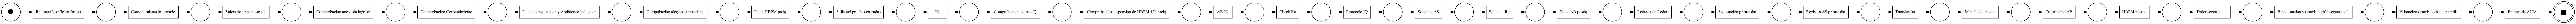

In [58]:
net_i_cadera, im_i_cadera, fm_i_cadera = pm.discover_petri_net_inductive(event_log_cadera)
pm.view_petri_net(net_i_cadera, im_i_cadera, fm_i_cadera)

/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[

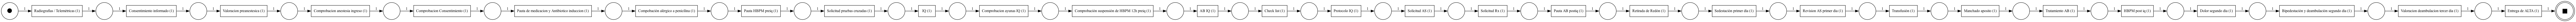

In [59]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net_i_cadera, im_i_cadera, fm_i_cadera, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=event_log_cadera)
pn_visualizer.view(gviz)
pn_visualizer.save(gviz, "Via_cadera.png")

In [60]:
file_path_rodilla="PTR_via.csv"
event_log_rodilla = pd.read_csv(file_path_rodilla,sep=';')
event_log_rodilla
#Este es el log de la vía clínica de rodilla

,NHC,Actividad,Timestamp
0,410784,Rx preiq,2021-11-08 00:00:00
1,410784,Consentimiento informado,2021-08-23 00:00:00
2,410784,Valoracion preanestesica,2023-05-04 00:00:00
3,410784,Comprobacion anestesia ingreso,2023-05-07 00:00:00
4,410784,Comprobacion Consentimiento,2023-05-07 00:00:00
5,410784,Pauta de medicacion y Antibiotico induccion,2023-05-07 00:00:00
6,410784,Compobación alérgico a penicilina,2023-05-07 00:00:00
7,410784,Pauta HBPM preiq,2023-05-07 00:00:00
8,410784,Solicitud pruebas cruzadas,2023-05-07 00:00:00
9,410784,IQ,2023-05-08 00:00:00


In [61]:
event_log_rodilla = pm.format_dataframe(event_log_rodilla, case_id='NHC', activity_key='Actividad', timestamp_key='Timestamp')
start_activities_rodilla = pm.get_start_activities(event_log_rodilla)
end_activities_rodilla = pm.get_end_activities(event_log_rodilla)
start_activities_rodilla,end_activities_rodilla

/var/folders/p3/52tdpv2x1szfs4jr5t3sv1180000gn/T/ipykernel_10570/2715547272.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  event_log_rodilla = pm.format_dataframe(event_log_rodilla, case_id='NHC', activity_key='Actividad', timestamp_key='Timestamp')
/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please sp

({'Consentimiento informado': 1}, {'Entrega de ALTA': 1})

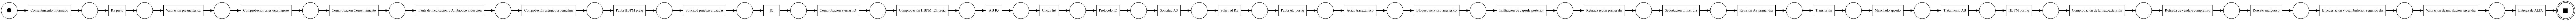

In [62]:
net_i_rodilla, im_i_rodilla, fm_i_rodilla = pm.discover_petri_net_inductive(event_log_rodilla)
pm.view_petri_net(net_i_rodilla, im_i_rodilla, fm_i_rodilla)

/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[

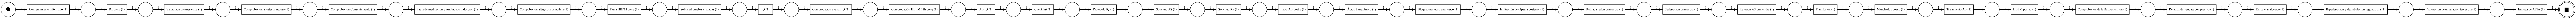

In [63]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net_i_rodilla, im_i_rodilla, fm_i_rodilla, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=event_log_rodilla)
pn_visualizer.view(gviz)
pn_visualizer.save(gviz, "Via_rodilla.png")